In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Equation

$\hat{\theta} = (X^T*X)^{-1}*X^T*y$ 

Generating some toy data.

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # best theta found, notice that the eq is y=4+3x

array([[ 4.6222953 ],
       [ 2.91999742]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.6222953 ],
       [ 10.46229013]])

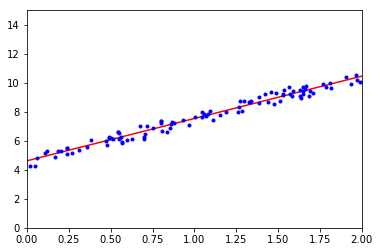

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

Equivalent in Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.6222953]), array([[ 2.91999742]]))

In [8]:
lin_reg.predict(X_new)

array([[  4.6222953 ],
       [ 10.46229013]])

# Gradient Descent

## Batch Gradient Descent 

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m =100

theta = np.random.rand(2,1) # random initialization

In [10]:
for iterations in range(n_iterations):
    gradients = 2.0/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[ 4.6222953 ],
       [ 2.91999742]])

## Stochastic Gradient Descent 

In [11]:
n_epochs = 50
t0, t1 = 5.0, 50 # learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.rand(2,1) # random initialization

In [12]:
a = 0
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1,:]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
print theta

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-12-a7761b6473fa>, line 10)

Equivalent in Scikit-learn

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_regressor.fit(X, y.ravel())
sgd_regressor.intercept_, sgd_regressor.coef_

(array([ 4.64477926]), array([ 2.941774]))

## Mini-batch Gradient Descent 

Computer the gradients on small random sets of instances called mini-batch.

# Polynomial Regression

In [14]:
m = 100
X = 6 * np.random.rand(m ,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

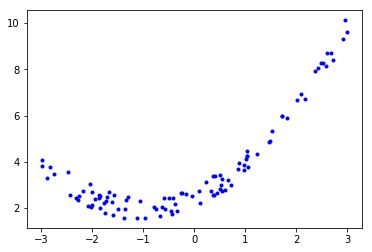

In [15]:
plt.plot(X, y, "b.")
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.2544097])

In [17]:
X_poly[0]

array([-2.2544097 ,  5.08236308])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.47302347]), array([[ 1.01543263,  0.49566966]]))

# Learning curves

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range (1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()

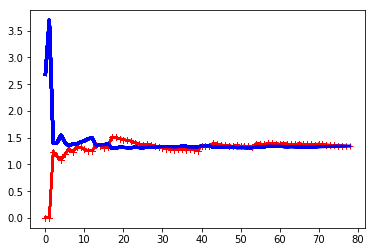

In [20]:
lin_reg = LinearRegression()
# model underfiting, performs poorly on training and validation data
plot_learning_curves(lin_reg, X, y) 

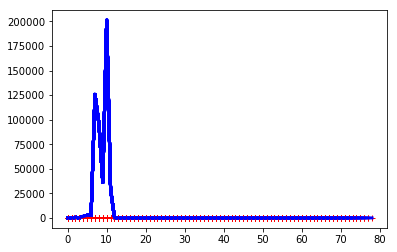

In [21]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

Model's generalization error can be bias, variance, or irreducible errors. 

**Bias:** It's due to wrong assumptions, e.g. assuming the data is linear when it's quadrantic.

**Variance:** It's when the model's execessive sensitivity to small variations in the training data. 

**Irreducible error:** noisiness of the data itself. 

# Regularized Linear Models

Regularization of linear models can be achieve by constraining the weights of the model.

## Ridge Regression

__Cost function__

$J(\theta)= MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$

Where $\alpha$ controls how much you want to regularize the model. If $\alpha=0$ then ridge regression is just a linear regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

__Closed-form solution__

$\hat\theta = (X^T*X+\alpha A)^-1*X^T*y$

Using a matrix factorization technique by André-lous Cholesky

In [22]:
# closed-form with scikit-learn
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.3113849]])

Using Stochastic Gradient Descent

In [23]:
# penalty sets the type of regularization term to use.
# "l2" indicates that you want SGD to add a regularization term 
# to the cost function equal to hasl the square of l2 norm of the
# weight vector: this is simply Ridge Regression.
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.17744536])

## Lasso Regression

_Least Absolute Shrinkage and Selection Operator Regression_

$J(\theta)= MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_i|$

Note: The Lsso cost function is not differentiable at $\theta_i=0$, but gradient descent works if you use a subgradient vector **g** (it's an intermediate vector between the gradient vectors around a nondifferentiable point).


In [25]:
# You can use tge Lasso class or SGDRegressor with penalty="l1"
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.25591466])

## Elastic Net

It's a combination of ridge regression and lasso regression, and it uses a regulator $r$ to control the mix. When $r=0$ is a Ridge Regression, and for $r=1$ is a lasso regression.

$J(\theta)= MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$

In [27]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 5.25707358])

## Early Stopping


In [40]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
minium_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continue where it left off
    y_val_predcit = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predcit, y_val)
    if(val_error < minium_val_error):
        minium_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        

In [41]:
best_epoch, best_model

(445, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
        random_state=None, shuffle=True, verbose=0, warm_start=True))

In [ ]:
'''
rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()
'''

# Logistic Regression

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [20]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

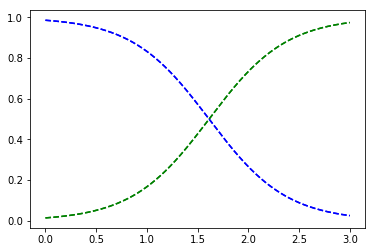

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g--", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

In [43]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

__Cross entropy__ is frequently used to meaure how well a set of estimated class probabilities match the target class

In [44]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [45]:
soft_max = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
soft_max.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
soft_max.predict([[5, 2]])

array([2])

In [47]:
soft_max.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])

In [49]:
iris['target_names'][2]

'virginica'

# Exercises